In [1]:
import pandas as pd
df = pd.read_csv('US_Accidents_Dec20.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [3]:
df.head(3)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


In [4]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors = 'coerce') #THIS WHOLE CELL IS EDITING THE DATE AND TIME COLUMNS
df['End_Time'] = pd.to_datetime(df['End_Time'], errors = 'coerce')
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.strftime('%B')
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1, 'm'))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Fram

<AxesSubplot:title={'center':'Station'}>

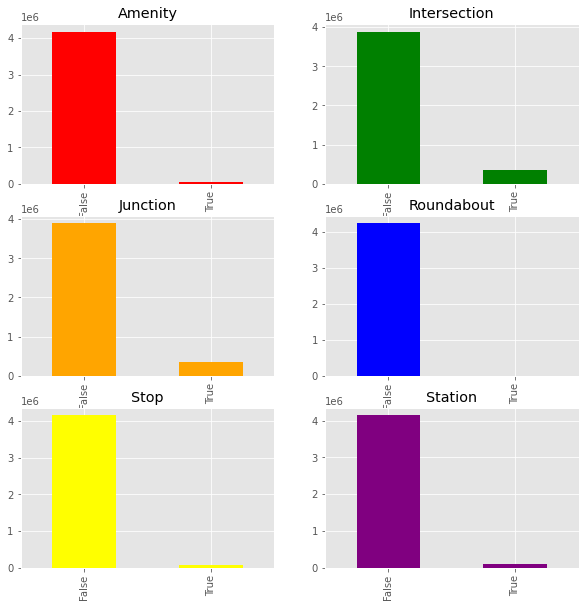

In [5]:
fig = plt.figure(figsize=(10, 10)) #PLOTTING SOME GENERAL STATISTICS
fig_dims = (3, 2)
plt.subplot2grid(fig_dims, (0, 0))
df['Amenity'].value_counts().plot(kind='bar', color='red', title='Amenity')
plt.subplot2grid(fig_dims, (0,1))
df['Crossing'].value_counts().plot(kind='bar', color='green', title='Intersection')
plt.subplot2grid(fig_dims, (1,0))
df['Junction'].value_counts().plot(kind='bar', color='orange', title='Junction')
plt.subplot2grid(fig_dims, (1,1))
df['Roundabout'].value_counts().plot(kind='bar', color='blue', title='Roundabout')
plt.subplot2grid(fig_dims, (2,0))
df['Stop'].value_counts().plot(kind='bar', color='yellow', title='Stop')
plt.subplot2grid(fig_dims, (2,1))
df['Station'].value_counts().plot(kind='bar', color='purple', title='Station')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


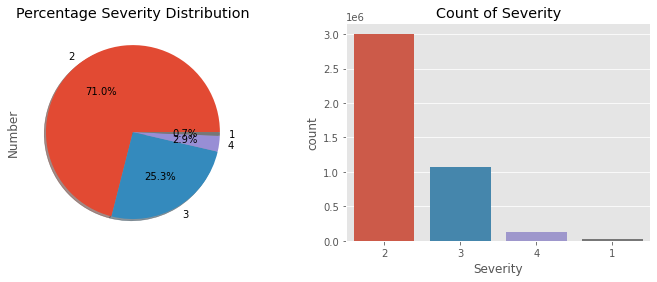

In [6]:
f,ax=plt.subplots(1,2,figsize=(12,4))
df['Severity'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Number')
sns.countplot('Severity', data=df, ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

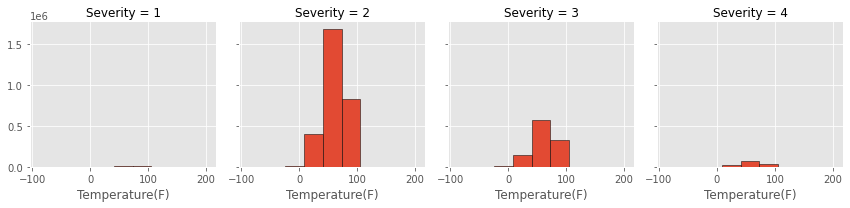

In [7]:
bins = np.linspace(df['Temperature(F)'].min(), df['Temperature(F)'].max(), 10)
g = sns.FacetGrid(df, col='Severity', palette="Set2", col_wrap=4)
g.map(plt.hist, 'Temperature(F)', bins=bins, ec="k")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Astronomical_Twilight'}>

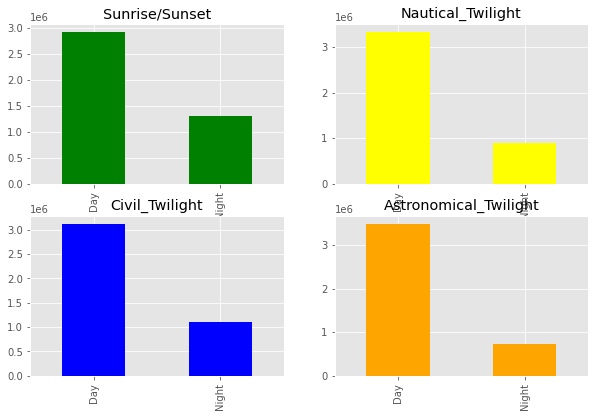

In [8]:
fig = plt.figure(figsize=(10,10))
fig_dims = (3,2)

plt.subplot2grid(fig_dims, (0,0))
df['Sunrise_Sunset'].value_counts().plot(kind='bar', color='green', title="Sunrise/Sunset")
plt.subplot2grid(fig_dims, (0,1))
df['Nautical_Twilight'].value_counts().plot(kind='bar',color='yellow',title='Nautical_Twilight')
plt.subplot2grid(fig_dims, (1,0)) 
df['Civil_Twilight'].value_counts().plot(kind='bar',color='blue',title='Civil_Twilight')
plt.subplot2grid(fig_dims, (1,1))
df['Astronomical_Twilight'].value_counts().plot(kind='bar',color='orange',title='Astronomical_Twilight')

<AxesSubplot:title={'center':'Comparing Months'}, xlabel='Month'>

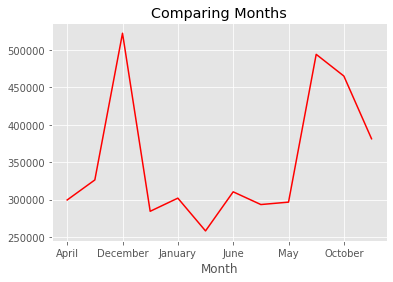

In [9]:
df.groupby("Month").size().plot(kind="line", color='red', title='Comparing Months')

<AxesSubplot:title={'center':'Comparing Days'}, xlabel='Weekday'>

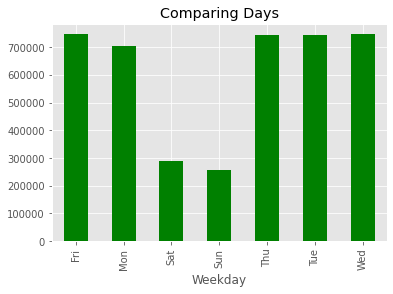

In [10]:
df.groupby("Weekday").size().plot(kind="bar",color='green',title='Comparing Days')

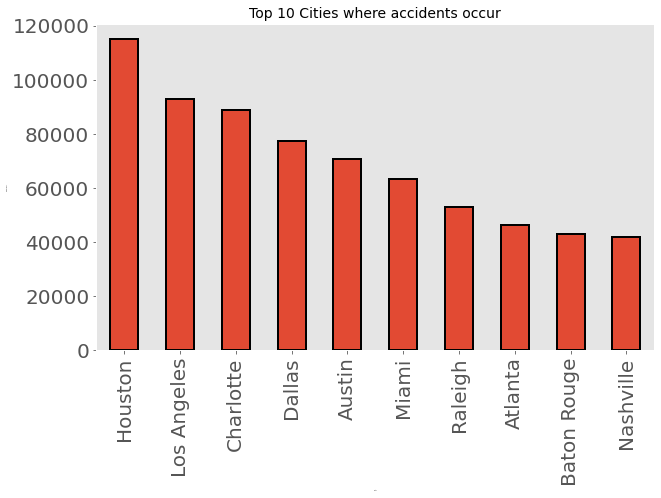

In [11]:
fig, ax=plt.subplots(figsize=(10,6))
df['City'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('City', fontsize=2)
plt.ylabel('Number',fontsize=2)
ax.tick_params(labelsize=20)
plt.title('Top 10 Cities where accidents occur', fontsize=14)
plt.grid()
plt.ioff()

In [12]:
df[td][df[td]<=0]
neg_outliers=df[td]<=0
df[neg_outliers] = np.nan

df.dropna(subset=[td],axis=0,inplace=True)

n=3
median = df[td].median()

std = df[td].std()
outliers = (df[td] - median).abs() > std*n
df[outliers] = np.nan
df[td].fillna(median, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4232541 entries, 0 to 4232540
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               float64       
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode               

In [13]:

feature_lst=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [14]:
df=df[feature_lst].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4232541 entries, 0 to 4232540
Data columns (total 33 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Source              object 
 1   TMC                 float64
 2   Severity            float64
 3   Start_Lng           float64
 4   Start_Lat           float64
 5   Distance(mi)        float64
 6   Side                object 
 7   City                object 
 8   County              object 
 9   State               object 
 10  Timezone            object 
 11  Temperature(F)      float64
 12  Humidity(%)         float64
 13  Pressure(in)        float64
 14  Visibility(mi)      float64
 15  Weather_Condition   object 
 16  Amenity             float64
 17  Bump                float64
 18  Crossing            float64
 19  Give_Way            float64
 20  Junction            float64
 21  No_Exit             float64
 22  Railway             float64
 23  Roundabout          float64
 24  Station             floa

In [ ]:
df.dropna(subset=df.columns[df.isnull().mean()!=0],how='any',axis=0, inplace=True)
df.shape

In [ ]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.info()

In [ ]:
df=df_dummy #Create the training/testing data
target='Severity'
y = df[target]
X = df.drop(target, axis=1)
len(X)

In [ ]:
algo_lst=['Logistic Regression', 'Decision Trees', 'K-Nearest Neighbors']
accuracylist = []

In [ ]:
lr = LogisticRegression(random_state=0) #Logistic Regression Calculation
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)
print('The accuracy_score of logistics regression is: {:.3f}.'.format(acc))

In [ ]:
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)
y_pred = dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred)
print('The accuacy score of Decision Tree entropy is: {:.3f}.' .format(accuracy_entropy))
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini',random_state=1)
dt_gini.fit(X_train, y_train)
y_pred = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_test)
acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)
print('The accuracy_score of Decision Tree gini is: {:.3f}.' .format(accuracy_gini))




In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)
print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy.score: {:.3f}.'.format(acc))
